<a href="https://colab.research.google.com/github/frijo12/diabetes-prediction-ml/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [ ]:
from google.colab import files
# uploaded = files.upload()

In [ ]:
# Load PIMA dataset (you can upload via the Colab file upload tool)
df = pd.read_csv("/content/pima_diabetes_synthetic_5000.csv")  # Or use your specific dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,142,63,25,67,30.301036,0.351686,42,1
1,7,101,42,40,53,21.930906,2.500000,47,1
2,0,127,66,27,38,26.953061,1.981577,34,0
3,3,52,68,13,20,31.366702,2.500000,31,0
4,0,98,104,5,56,39.357092,2.500000,24,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2.658800,99.955600,64.873200,22.381200,51.594800,29.904725,1.854565,32.26760,0.501400
std,2.329693,26.606706,16.683968,11.491244,35.132428,5.070762,0.814072,7.39736,0.500048
min,0.000000,50.000000,40.000000,5.000000,0.000000,15.000000,0.100000,20.00000,0.000000
25%,1.000000,81.000000,52.000000,13.000000,25.000000,26.447824,1.207605,27.00000,0.000000
50%,2.000000,100.000000,64.000000,22.000000,50.000000,30.137106,2.432560,32.00000,1.000000
75%,4.000000,119.000000,76.000000,30.250000,74.000000,33.430759,2.500000,37.00000,1.000000
max,14.000000,198.000000,120.000000,60.000000,199.000000,46.076226,2.500000,66.00000,1.000000


In [ ]:
df.shape

(5000, 9)

In [ ]:
#checking null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#code for checking count of zeros
for col in df.columns:
    print(col, (df[col] == 0).sum())

Pregnancies 992
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 514
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 2493


In [ ]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())


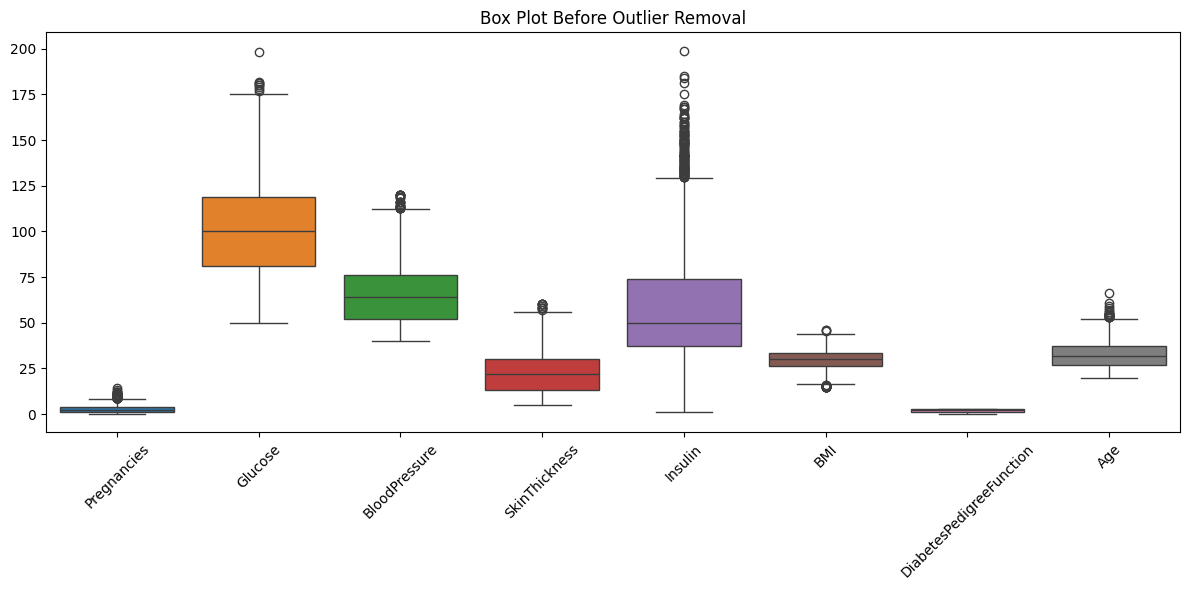

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Boxplot before outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Outcome", axis=1))
plt.title("Box Plot Before Outlier Removal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Logical outlier clipping based on medical/domain knowledge
df['Glucose'] = df['Glucose'].clip(lower=1)
df['BloodPressure'] = df['BloodPressure'].clip(lower=40)
df['SkinThickness'] = df['SkinThickness'].clip(lower=1)
df['Insulin'] = df['Insulin'].clip(lower=1, upper=400)
df['BMI'] = df['BMI'].clip(lower=1)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].clip(upper=2)
df['Age'] = df['Age'].clip(upper=100)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop("Outcome", axis=1))
y = df["Outcome"]


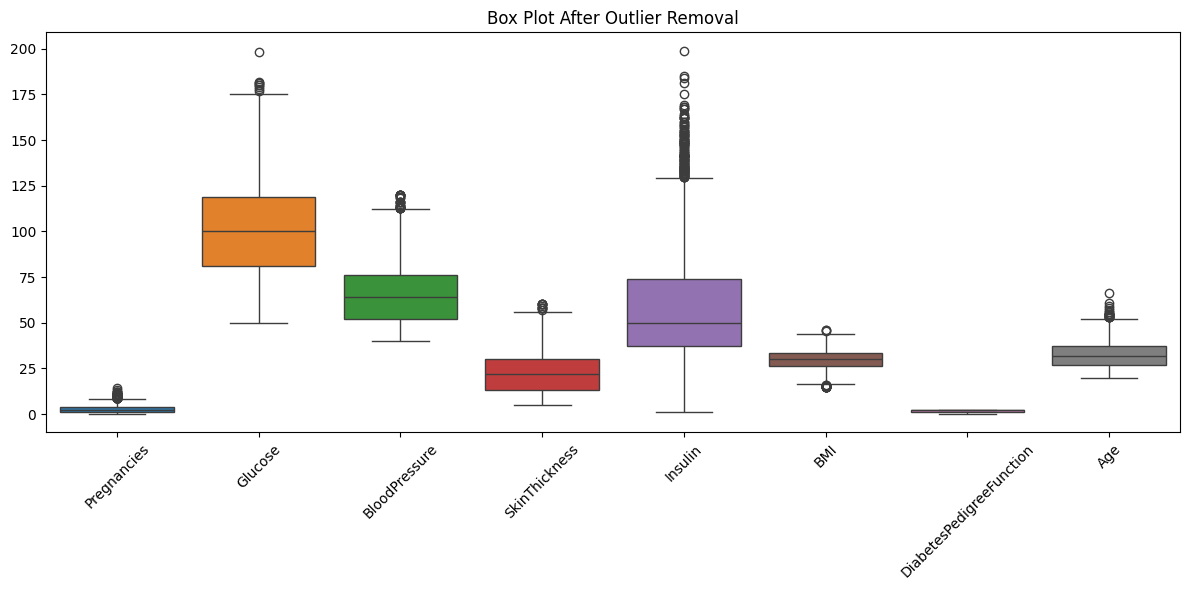

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Outcome", axis=1))
plt.title("Box Plot After Outlier Removal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(5000, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


In [ ]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by="Accuracy", ascending=False)


,Accuracy,Precision,Recall,F1 Score
SVM,0.897,0.877953,0.915811,0.896482
Random Forest,0.893,0.862595,0.928131,0.894164
KNN,0.893,0.863985,0.926078,0.893954
Gradient Boosting,0.876,0.845714,0.911704,0.877470
Decision Tree,0.853,0.833333,0.872690,0.852558
Logistic Regression,0.802,0.780583,0.825462,0.802395
Naive Bayes,0.766,0.747554,0.784394,0.765531


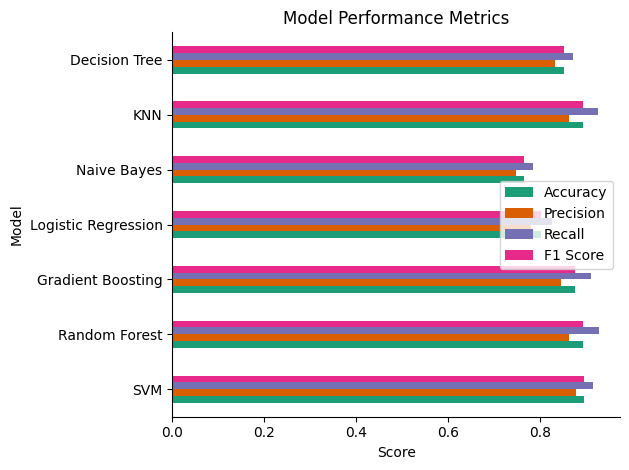

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Use results_df to plot the metrics
results_df.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Model Performance Metrics")
plt.xlabel("Score")
plt.ylabel("Model")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
#hyperparameter tunning for knn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
#define and setup GridSearchCv
parameter_grid_knn={'n_neighbors':[3,5,7,9]}
grid_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameter_grid_knn,cv=5,scoring='accuracy') #cv=5 split data into 5 parts,rotate fortraining/testing,evaluate based on accuracy ,#defining param_grid
#training
grid_knn.fit(X_train,y_train)  #5 fold cross validation -It splits your training data into 5 parts ,Trains on 4 parts, tests on 1 part , Repeats this 5 times (each time using a different test fold) to get best accuracy
print('best k value',grid_knn.best_params_)
print('best cross validation accuracy',grid_knn.best_score_)
#predicting using best estimator
y_predict_knn=grid_knn.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

best k value {'n_neighbors': 3}
best cross validation accuracy 0.90175
0.896
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       513
           1       0.87      0.92      0.90       487

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [ ]:
#hyperparameter tunning for svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

param_grid_svm={'kernel':['linear','rbf','poly']}   #Define Parameter Grid
grid_svm=GridSearchCV(estimator=SVC(),param_grid=param_grid_svm,cv=5,scoring='accuracy')
grid_svm.fit(X_train,y_train)
print('best kernal',grid_svm.best_params_)
print('best cross validation accuracy',grid_svm.best_score_)
y_predict_svm=grid_svm.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

best kernal {'kernel': 'rbf'}
best cross validation accuracy 0.9
0.897
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       513
           1       0.88      0.92      0.90       487

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



In [ ]:
#hyper parameter tunning for randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

param_grid_rf = {'n_estimators': [50, 100, 150,200]}
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),param_grid=param_grid_rf,cv=5,scoring='accuracy')
grid_rf.fit(X_train, y_train)
print(" Best n_estimators:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)
y_predictrf=grid_rf.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test,y_predictrf))
print("Classification Report", classification_report(y_test,y_predictrf))

 Best n_estimators: {'n_estimators': 150}
Best CV Accuracy: 0.9022499999999999
Test Accuracy: 0.899
Classification Report               precision    recall  f1-score   support

           0       0.93      0.87      0.90       513
           1       0.87      0.93      0.90       487

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



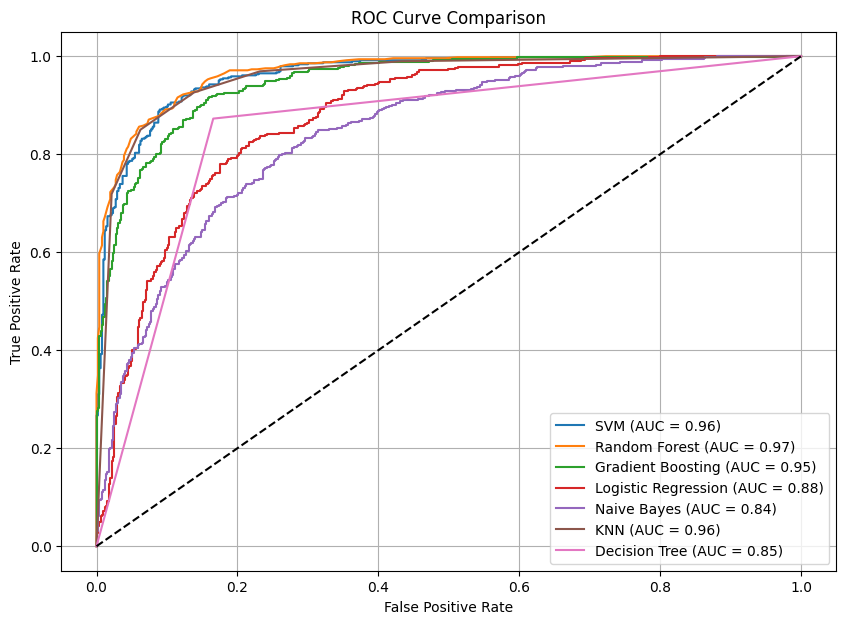

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary of trained models
# The models dictionary is already available from previous cells
# models = {
#     "Decision Tree": decision_tree_model,
#     "KNN": knn_model,
#     "Naive Bayes": naive_bayes_model,
#     "Logistic Regression": logistic_model,
#     "Gradient Boosting": gradient_boosting_model,
#     "Random Forest": random_forest_model,
#     "SVM": svm_model  # Should be trained with probability=True
# }

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get probability or decision scores
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    # Calculate FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = auc(fpr, tpr)

    # Plot ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
joblib.dump(models["Random Forest"], "diabetes_model.pkl")


['diabetes_model.pkl']

In [ ]:
import joblib
import numpy as np

# Load the model
model = joblib.load("/content/diabetes_model.pkl")

# Input data (replace these with dynamic input or user input later)
input_data = [  # Example: values must be in the same order as training data
    2,     # Pregnancies
    120,   # Glucose
    70,    # Blood Pressure
    20,    # Skin Thickness
    79,    # Insulin
    25.5,  # BMI
    0.351, # Diabetes Pedigree Function
    35     # Age
]

# Convert to numpy array and reshape
input_array = np.array(input_data).reshape(1, -1)

# Make prediction
prediction = model.predict(input_array)
result = "Diabetic" if prediction[0] == 1 else "Not Diabetic"

print("Prediction:", result)


Prediction: Not Diabetic
